In [0]:
#Crop Monitoring

import pandas.plotting as pdplt
import matplotlib.pylab as plt
import seaborn as sns
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import plotly.plotly as py

['dry' 'Healthy' 'Unfavourable']


<Figure size 432x288 with 0 Axes>

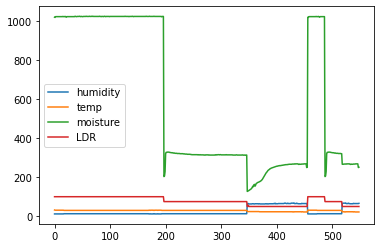

In [12]:
df = pd.read_csv("CMDATA.csv", names=['humidity', 'temp', 'moisture', 'LDR', 'label'])

print (df['label'].unique())


def encode_target(df, target_column):
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)
    return df_mod, targets
df2, targets = encode_target(df, "label")

df.cumsum()

plt.show()
plt.figure()
plt.show()
df.plot()

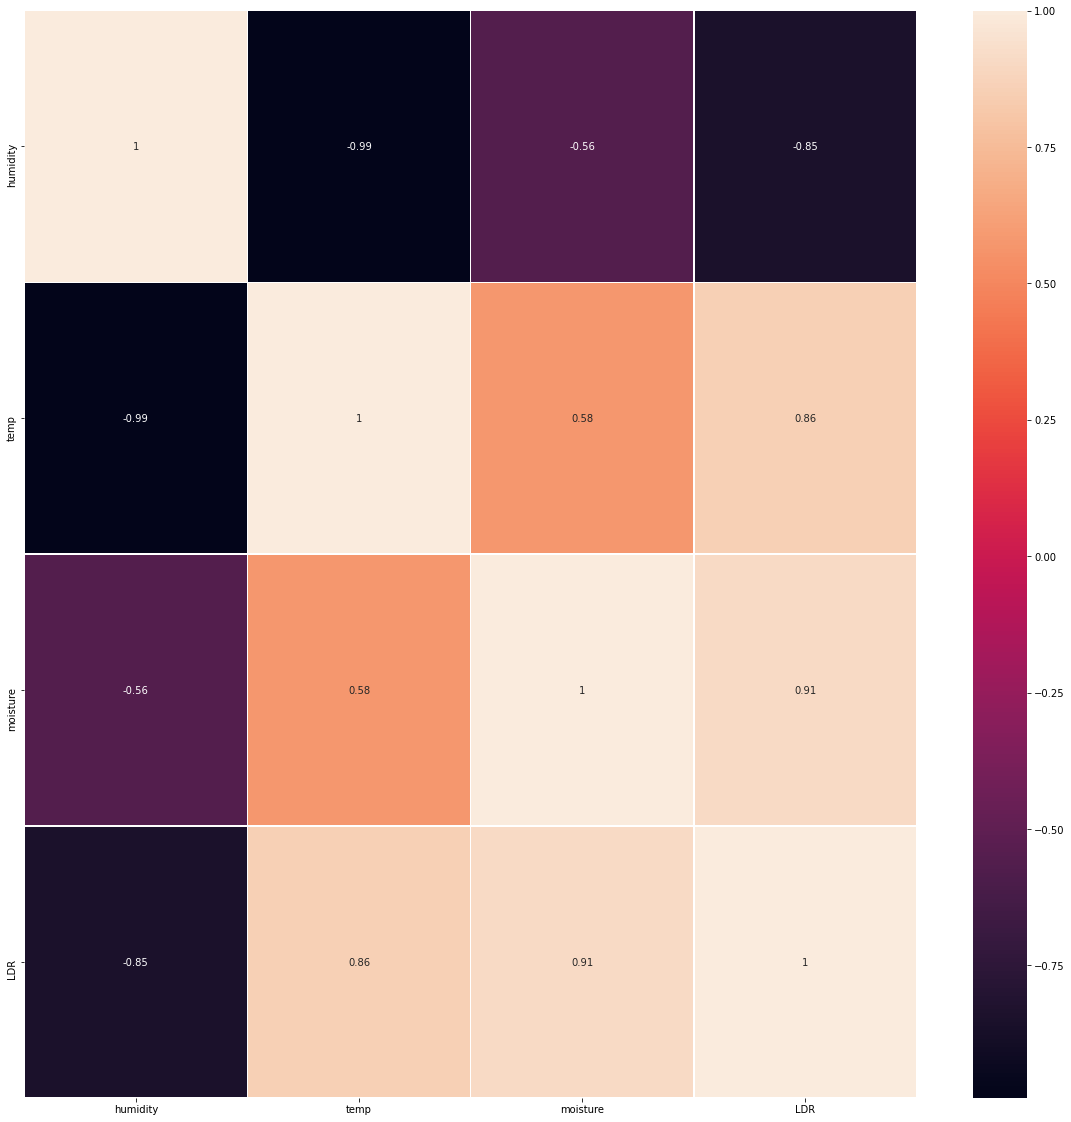

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculating the correlation matrix
corr = df.corr()
# Generating a heatmap
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
# sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


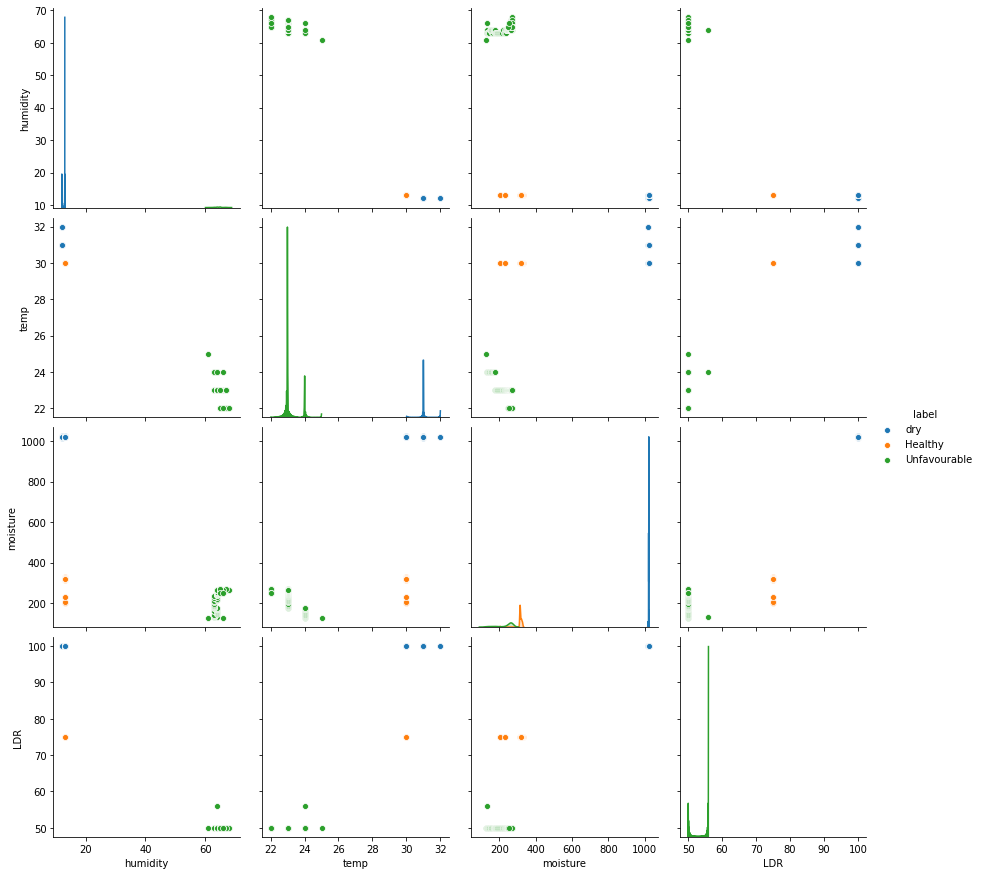

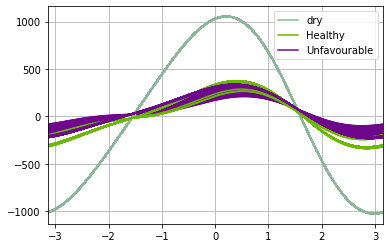

<Figure size 432x288 with 0 Axes>

In [14]:
sns.pairplot(df, hue="label", size=3)
plt.show()
pdplt.andrews_curves(df,"label",ax=None)
plt.show()
plt.figure()
plt.show()

In [15]:
features = list(df2.columns[:4])
y = df2["Target"]
X = df2[features]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)

dt.fit(X, y) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [16]:
##If Testing Consists Of One Record

dt_test = pd.read_csv("Test_1.csv", names=['humidity', 'temp', 'moisture', 'LDR'])
final_data = dt_test.head(1)
type = dt.predict(final_data)
# print (type)

if type==0:
    print ("Dry Conditions")
elif type==1:
    print ("Healthy Conditions")
else:
    print ("Unfavourable Conditions")


Healthy Conditions


In [17]:
#If Testing Consists Of Multiple Records

dt_test = pd.read_csv("Test_2.csv", names=['humidity', 'temp', 'moisture', 'LDR'])
final_data = dt_test
type = dt.predict(final_data)

for i in type:
    
    if (type[i]==0):
        print ("Dry Conditions")
    elif (type[i]==1):
        print ("Healthy Conditions")
    else:
        print ("Unfavourable Conditions")
    
    i=i+1
    


Dry Conditions


In [18]:
#Decision Tree Visualisation; It Will Be Saved In The Same Directory Itself

feature_names=['Humidity','Temp','Moisture','LDR']
class_names= ['dry','Healthy','Unfavorable']
def visualize_tree(tree,feature_names):

    with open("dt.dot", 'w') as f:
        export_graphviz(dt, out_file=f, feature_names=feature_names, class_names=class_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

visualize_tree(dt, features)
'''
data_clean = AH_data.dropna()
#data_clean.dtypes
#data_clean.describe()
predictors = [['Humidity','Temp','Moisture','LDR']]
targets = data_clean.output
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
'''
'''
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train,tar_train)
predictions = classifier.predict(pred_test)
print predictions
sklearn.metrics.accuracy_score(tar_test, predictions)
'''

'\nclassifier = DecisionTreeClassifier()\nclassifier = classifier.fit(pred_train,tar_train)\npredictions = classifier.predict(pred_test)\nprint predictions\nsklearn.metrics.accuracy_score(tar_test, predictions)\n'